### RNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load dataset
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
# Zero padding
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(x_train.shape)
print(x_test.shape)

(25000, 200)
(25000, 200)


In [ ]:
# One hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# Initilize model
model = models.Sequential()
model.add(layers.Embedding(max_features, 64, input_length=max_len))
model.add(layers.SimpleRNN(32, activation='tanh', return_sequences=False))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 643666 (2.46 MB)
Trainable params: 643666 (2.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 16s 80ms/step - loss: 0.6029 - accuracy: 0.6660 - val_loss: 0.5422 - val_accuracy: 0.7232
Epoch 2/10
176/176 [==============================] - 14s 81ms/step - loss: 0.3750 - accuracy: 0.8461 - val_loss: 0.3797 - val_accuracy: 0.8384
Epoch 3/10
176/176 [==============================] - 14s 79ms/step - loss: 0.2775 - accuracy: 0.8916 - val_loss: 0.3376 - val_accuracy: 0.8548
Epoch 4/10
176/176 [==============================] - 14s 79ms/step - loss: 0.2093 - accuracy: 0.9228 - val_loss: 0.3431 - val_accuracy: 0.8528
Epoch 5/10
176/176 [==============================] - 14s 82ms/step - loss: 0.1515 - accuracy: 0.9473 - val_loss: 0.3630 - val_accuracy: 0.8688
Epoch 6/10
176/176 [==============================] - 14s 78ms/step - loss: 0.1005 - accuracy: 0.9668 - val_loss: 0.4509 - val_accuracy: 0.8396
Epoch 7/10
176/176 [==============================] - 14s 78ms/step - loss: 0.0595 - accuracy: 0.9823 - val_loss: 0.4551 - val_accuracy:

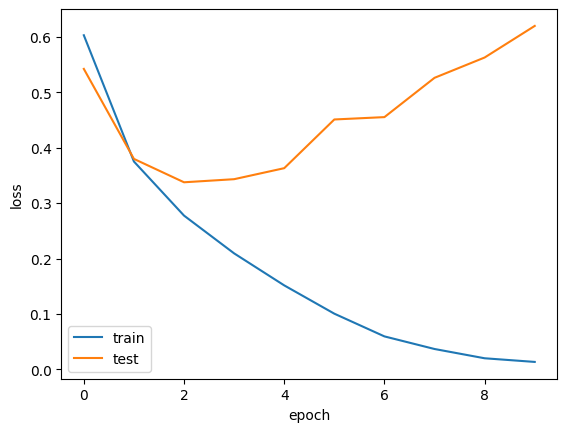

In [ ]:
# Visualize the fitting process
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('Test Accuracy:', test_acc)

782/782 [==============================] - 10s 13ms/step - loss: 0.6744 - accuracy: 0.8470
Test Accuracy: 0.8469600081443787


In [ ]:
# Print confusion matrix and classifiction report
preds = model.predict(x_test)
labels = [0, 1]
preds = [labels[np.argmax(probs)] for probs in preds]
print(confusion_matrix(y_test, preds), '\n')
print(classification_report(y_test, preds))

782/782 [==============================] - 10s 13ms/step
[[10636  1864]
 [ 1962 10538]] 

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     12500
           1       0.85      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

